***Title: GDP vs Population: A Productivity Check of Indian States***

***Objective: To analyze the relationship between a state's GDP and its population and evaluate the economic productivity of Indian states using GDP per capita as an indicator. This helps identify which states generate more economic output per person and which lag behind, offering insights into regional disparities in development.***

***Data Source : Public Government Data (2024 estimates).***

***Tools Used: Python, pandas, matplotlib, Jupyter Notebook.***

***Exploratory Data Analysis***

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
data = pd.read_csv('states data.csv')
data.head(10)

State Per Capita Income   Mortality Rate  \
0  Andaman and Nicobar Islands           2,29,080             5.8   
1               Andhra Pradesh           1,92,587             4.5   
2            Arunachal Pradesh           2,05,645             5.7   
3                        Assam           1,18,504             6.2   
4                        Bihar             47,498             5.4   
5                  Chandirgarh           3,33,932             3.9   
6                 Chhattisgarh           1,20,704             6.3   
7                        Delhi           3,89,529             3.6   
8                          Goa           4,72,070             6.3   
9                      Gujarat           2,41,930             5.6   

            GDP   Birth rate  Life Expectancy Population (2024) Literacy Rate  
0   1,03,705.20          1.3            73.31          3,80,000        86.63%  
1   1,13,38,365          1.7            70.60       5,34,02,000        66.40%  
2   3,51,235.40          1.8            69.87         13,80,000        66.95%  
3  41,26,118.70          1.9            67.90       3,61,59,000        85.90%  
4  65,03,024.30          3.0            69.50      12,92,05,000        70.90%  
5   4,56,352.60          1.4            68.70         12,31,000        86.43%  
6  40,64,158.20          1.8            65.10       3,06,38,000        77.30%  
7  90,46,420.40          1.6            75.80       2,24,00,000        88.70%  
8      8,26,037          1.3            72.59         15,30,000        88.70%  
9    19770664.6          1.9            70.50       7,26,53,000        82.40%

In [12]:
# About the dataset:
print(data.shape)
print()
print(data.columns)
print()
data.info()
print()
print(data.describe())
print()
print(data.isnull())
print()
print(data.size)
print()

(33, 8)

Index(['State', 'Per Capita Income ', 'Mortality Rate', 'GDP', ' Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               33 non-null     object 
 1   Per Capita Income   33 non-null     object 
 2   Mortality Rate      33 non-null     float64
 3   GDP                 33 non-null     object 
 4    Birth rate         33 non-null     float64
 5   Life Expectancy     33 non-null     float64
 6   Population (2024)   33 non-null     object 
 7   Literacy Rate       33 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.2+ KB

       Mortality Rate   Birth rate  Life Expectancy
count       33.000000    33.000000        33.000000
mean         5.621212     1.821212        70.572727
std          1.016968   

In [13]:
# Remove commas and convert to numeric
data['GDP'] = data['GDP'].astype(str).str.replace(',', '').astype(float)
data['Population (2024)'] = data['Population (2024)'].astype(str).str.replace(',', '').str.replace(r'\(.*\)', '', regex=True).astype(float)

# Calculate GDP per capita
data['GDP(per capita)'] = data['GDP'] / data['Population (2024)']
data

State Per Capita Income   Mortality Rate  \
0   Andaman and Nicobar Islands           2,29,080             5.8   
1                Andhra Pradesh           1,92,587             4.5   
2             Arunachal Pradesh           2,05,645             5.7   
3                         Assam           1,18,504             6.2   
4                         Bihar             47,498             5.4   
5                   Chandirgarh           3,33,932             3.9   
6                  Chhattisgarh           1,20,704             6.3   
7                         Delhi           3,89,529             3.6   
8                           Goa           4,72,070             6.3   
9                       Gujarat           2,41,930             5.6   
10                      Haryana           2,64,835             6.1   
11             Himachal Pradesh           2,01,271             6.8   
12            Jammu and Kashmir           1,20,790             4.6   
13                    Jharkhand             84,059             5.2   
14                    Karnataka           2,65,623             6.2   
15                       Kerala           2,33,855             7.0   
16               Madhya Pradesh           1,21,594             6.5   
17                  Maharashtra           2,15,223             5.5   
18                      Manipur             91,560             4.3   
19                    Meghalaya             98,572             5.3   
20                      Mizoram           1,98,562             4.2   
21                     Nagaland           1,25,887             3.7   
22                       Odisha           1,28,181             7.3   
23                   Puducherry           2,51,344             6.5   
24                       Punjab           1,68,705             7.2   
25                    Rajasthan           1,35,962             5.6   
26                       Sikkim           4,72,543             4.1   
27                   Tamil Nadu           2,42,253             6.1   
28                    Telangana           2,70,839             6.0   
29                      Tripura             137472             5.7   
30                Uttar Pradesh             73,048             6.5   
31                  Uttarakhand           2,11,657             6.3   
32                  West Bengal           1,24,798             5.5   

           GDP   Birth rate  Life Expectancy  Population (2024) Literacy Rate  \
0     103705.2          1.3            73.31           380000.0        86.63%   
1   11338365.0          1.7            70.60         53402000.0        66.40%   
2     351235.4          1.8            69.87          1380000.0        66.95%   
3    4126118.7          1.9            67.90         36159000.0        85.90%   
4    6503024.3          3.0            69.50        129205000.0        70.90%   
5     456352.6          1.4            68.70          1231000.0        86.43%   
6    4064158.2          1.8            65.10         30638000.0        77.30%   
7    9046420.4          1.6            75.80         22400000.0        88.70%   
8     826037.0          1.3            72.59          1530000.0        88.70%   
9   19770664.6          1.9            70.50         72653000.0        82.40%   
10   8706645.3          1.9            69.90         30694000.0        80.40%   
11   1762694.7          1.7            73.50          7468000.0        83.78%   
12   1999174.2          1.4            74.30         13603000.0        67.16%   
13   3588625.9          2.3            69.60         40129000.0        74.30%   
14  19627254.2          1.7            69.80         68256000.0        77.20%   
15   9324699.6          1.8            75.00         35967000.0        96.20%   
16  11361371.9          2.0            67.40         87954000.0        73.70%   
17  31080218.7          1.7            72.90        127684000.0        84.80%   
18    365944.7          2.2            70.87          3223000.0        79.85%   
19    387847.0          2

In [14]:
# Top 5 most productive states
print("Top 5 most productive states:")
print(data[['State','GDP(per capita)']].sort_values(by='GDP(per capita)', ascending=False).head(5))
# Bottom 5 least productive states
print("\nBottom 5 least productive states:")
print(data[['State','GDP(per capita)']].sort_values(by='GDP(per capita)').head(5))

Top 5 most productive states:
          State  GDP(per capita)
26       Sikkim     61569.508197
8           Goa         0.539893
7         Delhi         0.403858
5   Chandirgarh         0.370717
28    Telangana         0.294623

Bottom 5 least productive states:
            State  GDP(per capita)
4           Bihar         0.050331
30  Uttar Pradesh         0.082660
13      Jharkhand         0.089427
18        Manipur         0.113542
3           Assam         0.114110


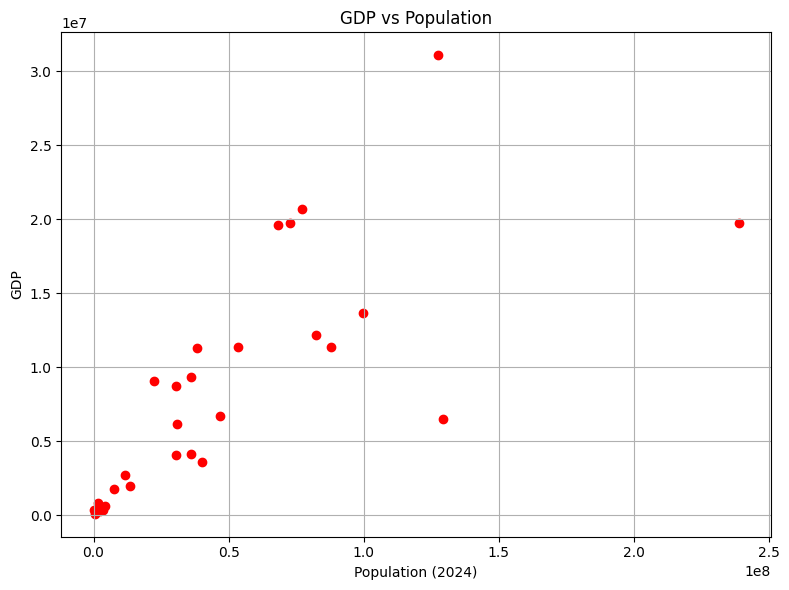

Correlation between GDP and Population: 0.76


In [19]:
# Scatter plot of GDP vs Population
plt.figure(figsize=(8,6))
plt.scatter(data['Population (2024)'], data['GDP'], color='red')
plt.title('GDP vs Population')
plt.xlabel('Population (2024)')
plt.ylabel('GDP')
plt.tight_layout()
plt.grid(True)
plt.savefig('gdp_vs_population.png')
plt.show()
correlation = data['GDP'].corr(data['Population (2024)'])
print(f"Correlation between GDP and Population: {correlation:.2f}")

 ***Conclusion***

***The correlation between GDP and Population is positive,meaning states with higher population tend to have higher total GDP.***
***However, productivity varies significantly.***

***Sikkim and Goa are most productive (highest GDP per capita).***

***Bihar, UP, and Jharkhand are least productive despite large populations.***

***This shows that economic productivity is not solely population-dependent; policy, education, industrialization, and infrastructure also matter.***